In [5]:
Bounding_box.head()

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN


In [ ]:
#count the number of patients in the dataset
print("Number of patients in the dataset: ", nih_data['Patient ID'].nunique())
#count the number of patients that have bounding box: the first 8 unique digits of the image index coloumn is the patient id and it is a string
print("Number of patients that have bounding box: ", Bounding_box['Image Index'].apply(lambda x: x[:8]).nunique())
#Number of labels that are there nad the count of it in both bounding box and nih_data
print("Number of labels in the dataset: ", nih_data['Finding Labels'].nunique())
print("Number of labels in the bounding box dataset: ", Bounding_box['Finding Label'].nunique())

Number of patients in the dataset:  30805
Number of patients that have bounding box:  726
Number of labels in the dataset:  836
Number of labels in the bounding box dataset:  8


In [14]:
#What are the bouding box labels
print("Bounding box labels: ", Bounding_box['Finding Label'].unique())
#What are the labels in the nih_data
print("NIH data labels: ", nih_data['Finding Labels'].unique())

Bounding box labels:  ['Atelectasis' 'Cardiomegaly' 'Effusion' 'Infiltrate' 'Mass' 'Nodule'
 'Pneumonia' 'Pneumothorax']
NIH data labels:  ['Cardiomegaly' 'Cardiomegaly|Emphysema' 'Cardiomegaly|Effusion'
 'No Finding' 'Hernia' 'Hernia|Infiltration' 'Mass|Nodule' 'Infiltration'
 'Effusion|Infiltration' 'Nodule' 'Emphysema' 'Effusion' 'Atelectasis'
 'Effusion|Mass' 'Emphysema|Pneumothorax' 'Pleural_Thickening'
 'Effusion|Emphysema|Infiltration|Pneumothorax'
 'Emphysema|Infiltration|Pleural_Thickening|Pneumothorax'
 'Effusion|Pneumonia|Pneumothorax' 'Pneumothorax'
 'Effusion|Infiltration|Pneumothorax' 'Infiltration|Mass'
 'Infiltration|Mass|Pneumothorax' 'Mass'
 'Cardiomegaly|Infiltration|Mass|Nodule'
 'Cardiomegaly|Effusion|Emphysema|Mass'
 'Atelectasis|Cardiomegaly|Emphysema|Mass|Pneumothorax' 'Emphysema|Mass'
 'Emphysema|Mass|Pneumothorax' 'Atelectasis|Pneumothorax'
 'Cardiomegaly|Emphysema|Pneumothorax' 'Mass|Pleural_Thickening'
 'Cardiomegaly|Mass|Pleural_Thickening' 'Effusion|Infilt

In [20]:
#how many individual labels are there in the dataset some patients have multiple labels seperate by | and i need to know what are they
labels = nih_data['Finding Labels'].str.split('|', expand=True).stack().value_counts()
print("Number of individual labels in the dataset: ", len(labels))
print("Individual labels in the dataset: ", labels)

#how many individual labels are there in the bounding box dataset
labels = Bounding_box['Finding Label'].value_counts()
print("Number of individual labels in the bounding box dataset: ", len(labels))
print("Individual labels in the bounding box dataset: ", labels)





Number of individual labels in the dataset:  15
Individual labels in the dataset:  No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: count, dtype: int64
Number of individual labels in the bounding box dataset:  8
Individual labels in the bounding box dataset:  Finding Label
Atelectasis     180
Effusion        153
Cardiomegaly    146
Infiltrate      123
Pneumonia       120
Pneumothorax     98
Mass             85
Nodule           79
Name: count, dtype: int64


In [ ]:

# Function to count diseases per patient
def analyze_multiple_diseases(dataframe):
    # Dictionary to store patient disease counts
    patient_disease_counts = {}
    
    # Iterate through each row
    for index, row in dataframe.iterrows():
        patient_id = row['Patient ID']
        diseases = row['Finding Labels'].split('|')
        
        # Add unique diseases for this patient
        if patient_id not in patient_disease_counts:
            patient_disease_counts[patient_id] = set()
        
        for disease in diseases:
            patient_disease_counts[patient_id].add(disease)
    
    # Count patients with different numbers of diseases
    disease_count_summary = {}
    for patient, diseases in patient_disease_counts.items():
        num_diseases = len(diseases)
        if num_diseases not in disease_count_summary:
            disease_count_summary[num_diseases] = 0
        disease_count_summary[num_diseases] += 1
    
    return patient_disease_counts, disease_count_summary

# Run the analysis
patient_diseases, disease_summary = analyze_multiple_diseases(nih_data)

# Print results
print("Patient Disease Records:")
for patient, diseases in patient_diseases.items():
    print(f"Patient {patient}: {', '.join(diseases)} ({len(diseases)} diseases)")

print("\nSummary of Patients by Number of Diseases:")
for num_diseases, count in sorted(disease_summary.items()):
    print(f"Patients with {num_diseases} disease(s): {count}")

print(f"\nTotal patients with multiple diseases: {sum(count for num, count in disease_summary.items() if num > 1)}")

# Get a list of all diseases in the dataset
all_diseases = []
for diseases in patient_diseases.values():
    all_diseases.extend(diseases)
    
unique_diseases = sorted(set(all_diseases))
print(f"\nTotal unique diseases found: {len(unique_diseases)}")
print(f"Disease list: {', '.join(unique_diseases)}")

Patient Disease Records:
Patient 1: Effusion, Cardiomegaly, Emphysema (3 diseases)
Patient 2: No Finding (1 diseases)
Patient 3: Hernia, Infiltration (2 diseases)
Patient 4: Nodule, Mass (2 diseases)
Patient 5: No Finding, Effusion, Infiltration (3 diseases)
Patient 6: No Finding (1 diseases)
Patient 7: No Finding (1 diseases)
Patient 8: Nodule, No Finding, Cardiomegaly (3 diseases)
Patient 9: Emphysema (1 diseases)
Patient 10: Infiltration (1 diseases)
Patient 11: Atelectasis, No Finding, Effusion, Infiltration (4 diseases)
Patient 12: Effusion, Mass (2 diseases)
Patient 13: Pneumonia, Effusion, Emphysema, Pneumothorax, Pleural_Thickening, Infiltration, Cardiomegaly, Atelectasis, Nodule, No Finding, Mass (11 diseases)
Patient 14: No Finding (1 diseases)
Patient 15: No Finding (1 diseases)
Patient 16: No Finding (1 diseases)
Patient 17: Nodule, No Finding, Effusion, Infiltration (4 diseases)
Patient 18: No Finding (1 diseases)
Patient 19: Atelectasis, Effusion, Pleural_Thickening (3 di

                                Metric  Value
                        Total Patients 30,805
               Patients with 1 Disease 20,224
       Patients with Multiple Diseases 10,581
     Percentage with Multiple Diseases 34.35%
Average Number of Diseases per Patient   1.94


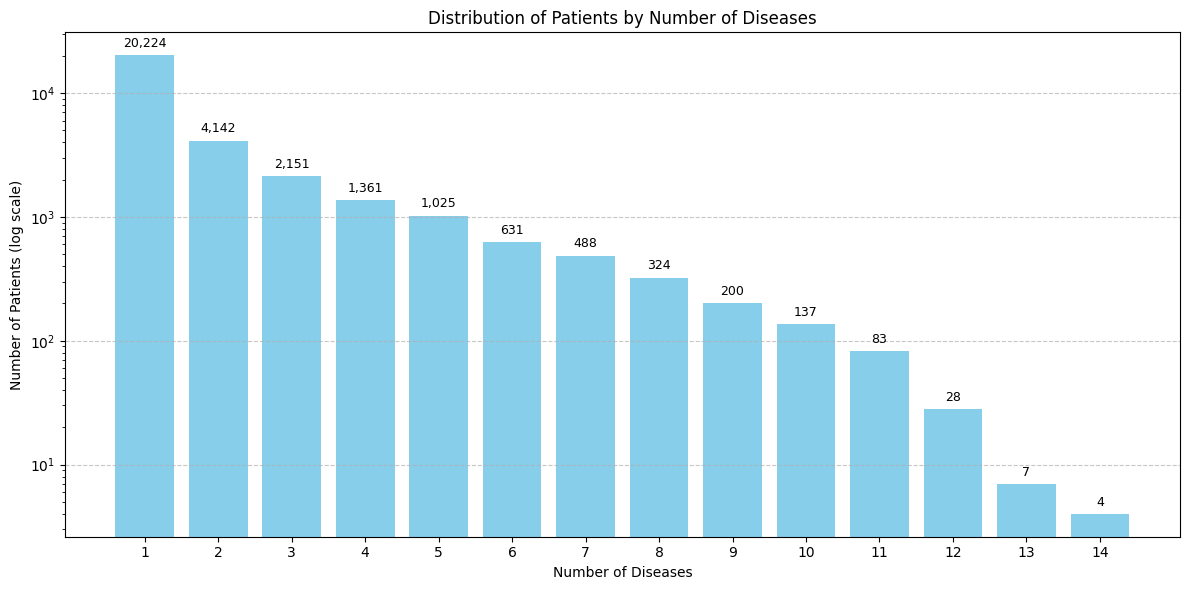

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from your results
data = {
    'Number of Diseases': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Number of Patients': [20224, 4142, 2151, 1361, 1025, 631, 488, 324, 200, 137, 83, 28, 7, 4]
}

df = pd.DataFrame(data)

# Calculate total patients
total_patients = df['Number of Patients'].sum()

# Calculate patients with multiple diseases
patients_with_multiple = total_patients - df.loc[df['Number of Diseases'] == 1, 'Number of Patients'].sum()

# Create summary DataFrame
summary_df = pd.DataFrame({
    'Metric': [
        'Total Patients',
        'Patients with 1 Disease',
        'Patients with Multiple Diseases',
        'Percentage with Multiple Diseases',
        'Average Number of Diseases per Patient'
    ],
    'Value': [
        f"{total_patients:,}",
        f"{df.loc[df['Number of Diseases'] == 1, 'Number of Patients'].sum():,}",
        f"{patients_with_multiple:,}",
        f"{patients_with_multiple/total_patients*100:.2f}%",
        f"{(df['Number of Diseases'] * df['Number of Patients']).sum() / total_patients:.2f}"
    ]
})

print(summary_df.to_string(index=False))

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(df['Number of Diseases'], df['Number of Patients'], color='skyblue')
plt.yscale('log')  # Using log scale to better visualize the distribution
plt.xlabel('Number of Diseases')
plt.ylabel('Number of Patients (log scale)')
plt.title('Distribution of Patients by Number of Diseases')
plt.xticks(df['Number of Diseases'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations above each bar
for i, v in enumerate(df['Number of Patients']):
    plt.text(i+1, v*1.1, f"{v:,}", ha='center', va='bottom', rotation=0, fontsize=9)

plt.tight_layout()
plt.show()

In [2]:
import os
import pandas as pd

# Define paths
nih_base_path = "/Users/anyhow/projects/data_science/Medical-Report-Generation/remote-dataset/NIH-Chest-X-rays"
image_folders = [f"images_{str(i).zfill(3)}" for i in range(1, 13)]  # images_001 to images_012
metadata_path = os.path.join(nih_base_path, "Data_Entry_2017.csv")

def check_images_exist():
    # Load metadata
    df = pd.read_csv(metadata_path)
    
    # Get all image names from the metadata
    all_image_names = set(df["Image Index"])
    total_images = len(all_image_names)
    
    # Track found and missing images
    found_images = set()
    
    print(f"Checking for {total_images} images across {len(image_folders)} folders...")
    
    # Check each folder
    for folder in image_folders:
        folder_path = os.path.join(nih_base_path, folder)
        if not os.path.exists(folder_path):
            print(f"Warning: Folder {folder_path} does not exist")
            continue
        
        # Get all files in this folder
        files_in_folder = set(os.listdir(folder_path))
        
        # Find images that are in this folder
        found_in_this_folder = all_image_names.intersection(files_in_folder)
        found_images.update(found_in_this_folder)
        
        print(f"Found {len(found_in_this_folder)} images in {folder}")
    
    # Determine which images are missing
    missing_images = all_image_names - found_images
    
    # Report results
    print("\nSummary:")
    print(f"Found {len(found_images)} images out of {total_images}")
    print(f"Missing {len(missing_images)} images")
    
    if missing_images:
        print(f"First 10 missing images: {list(missing_images)[:10]}")
    
    return found_images, missing_images

# Run the check
found_images, missing_images = check_images_exist()

Checking for 112120 images across 12 folders...
Found 4999 images in images_001
Found 10000 images in images_002
Found 10000 images in images_003
Found 10000 images in images_004
Found 10000 images in images_005
Found 10000 images in images_006
Found 10000 images in images_007
Found 10000 images in images_008
Found 10000 images in images_009
Found 10000 images in images_010
Found 10000 images in images_011
Found 7121 images in images_012

Summary:
Found 112120 images out of 112120
Missing 0 images
